## Feature Engineering

###  377 - Feature Engineering - Introdução
<h1>Enriquecimento de Features (Feature Engineering)</h1><h2>Tema central</h2><p>Técnicas para melhorar o desempenho de modelos de machine learning através da seleção, transformação e criação de novas features (variáveis/colunas) nos dados.</p><h2>Objetivos</h2><ul><li>Melhorar o desempenho/performance dos modelos</li><li>Reduzir custos removendo features desnecessárias</li><li>Aumentar a interpretabilidade focando nas features mais importantes</li></ul><h2>Técnicas abordadas</h2><h3>Merge com outras tabelas</h3><ul><li>Adicionar novas informações de outras fontes de dados</li><li>Ex: adicionar dados climáticos ou econômicos de acordo com a data</li></ul><h3>Operações aritméticas</h3><ul><li>Criar novas features combinando as existentes</li><li>Ex: gorjeta/total da conta</li></ul><h3>Extração de padrões texto</h3><ul><li>Usar expressões regulares para extrair padrões</li><li>Ex: títulos pessoais (Mr., Mrs., etc) dos nomes</li></ul><h3>Discretização</h3><ul><li>Transformar valores numéricos em categorias</li><li>Ex: idades em faixas etárias</li></ul><h2>Importante</h2><ul><li>Novas features precisam estar disponíveis também nos dados futuros que serão utilizados para predições</li><li>Persistir diante dos erros (pesquisar, aprender)</li></ul><p>Espero que esse resumo em forma de mapa mental tenha capturado os principais pontos e técnicas abordados no vídeo sobre enriquecimento de features. Foi um prazer produzir esse conteúdo!</p>

In [ ]:
df= sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['tip_normalized']=df['tip']/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_normalized
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [ ]:
# Base do Titanic
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Regex
df.Name.str.extract('.*?, (.*?)\.', expand=False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
df['personal_title']=df.Name.str.extract('.*?, (.*?)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 378 - Feature Engineering - Análise Gráfica
<h1>Tema central: Seleção de features para modelagem</h1><h2>Análise gráfica</h2><ul><li>Plotar distribuições e boxplots para visualizar diferenças entre grupos da variável-alvo (ex: sobrevivência no Titanic)</li><li>Identificar variáveis cujas distribuições mudam de acordo com a variável-alvo</li><li>Variáveis com distribuições diferentes conforme a variável-alvo têm potencial para serem importantes para o modelo</li></ul><h2>Correlação</h2><ul><li>Matriz de correlação entre variáveis numéricas</li><li>Hitmap colorido mostra correlações par-a-par</li><li>Para o Titanic:<ul><li>Classe tem correlação negativa com cobrança (quanto maior a classe, menor a cobrança)</li><li>Maior correlação de sobrevivência é com classe (negativa) e cobrança</li></ul></li></ul><h2>Outros</h2><ul><li>Mutual Information: métrica como correlação, mas captura também relações não lineares</li><li>Importante selecionar quais features usar ou não para modelagem</li><li>Pode-se juntar variáveis para criar novas features (ex: classe + idade)</li></ul>

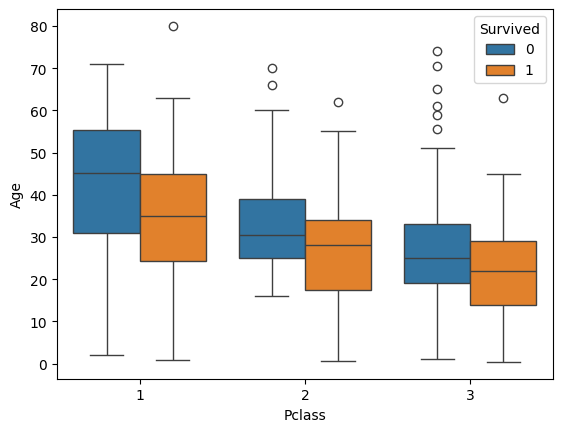

In [ ]:
# Observando diferenças nas distribuições
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived');

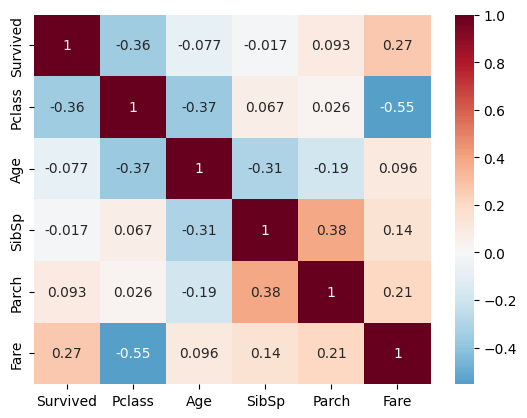

In [ ]:
# Observando correlação (linear)
# RdBu com _r a cor fica vermelho o principal
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df_model= df.drop(columns=['Name','Ticket','Cabin','Sex','Embarked']).dropna()
df_model.head()
sns.heatmap(df_model.corr(), cmap='RdBu_r', center=0, annot=True);

###  379 - Feature Engineering - Mutual Information
<p>TEMA CENTRAL:Métricas para selecionar features importantes em modelos de machine learning</p><p>TÓPICOS ABORDADOS:</p><ul><li><p>Mutual Information Classifier e Mutual Information Regressor</p><ul><li>Funções do Scikit-Learn para avaliar importância de features</li><li>Baseadas no princípio de entropia</li><li>Capturam correlação não linear entre features e target</li></ul></li><li><p>Pré-processamento necessário</p><ul><li>Codificar features categóricas como inteiros</li><li>Definir quais features são categóricas (discrete_features)</li></ul></li><li><p>Aplicação no dataframe Titanic</p><ul><li>Definição de target (variável resposta) e features</li><li>Uso do OrdinalEncoder</li><li>Cálculo dos scores de importância de cada feature</li><li>Título pessoal e sexo foram os mais importantes</li></ul></li><li><p>Observação final</p><ul><li>Métricas são bivariadas (analisam cada feature individualmente)</li><li>Uma feature pode não ser importante sozinha mas ser em conjunto com outras</li><li>Mesmo assim, é útil para identificar potenciais features importantes</li></ul></li></ul>

In [ ]:
# Mutual information
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [ ]:
# Drop columns and Nas
df_model= df.drop(columns=['Name','Ticket','Cabin']).dropna()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
target = df_model['Survived']
df_features = df_model.drop(columns='Survived')

In [ ]:
cat_features = df_features.select_dtypes(exclude='number').columns
cat_features

encoder = OrdinalEncoder()
df_model[cat_features]=encoder.fit_transform(df_model[cat_features]).astype(int)
df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,11
2,1,0,38.0,1,0,71.2833,0,12
3,3,0,26.0,0,0,7.9250,2,8
4,1,0,35.0,1,0,53.1000,2,12
5,3,1,35.0,0,0,8.0500,2,11


In [ ]:
discrete_features = df_features.dtypes==int
discrete_features

,0
Pclass,True
Sex,True
Age,False
SibSp,True
Parch,True
Fare,False
Embarked,True
personal_title,True


In [ ]:
scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_features)
scores

array([0.06516276, 0.14840857, 0.04164687, 0.01723787, 0.02126715,
       0.12214641, 0.01930984, 0.17785974])

<Axes: >

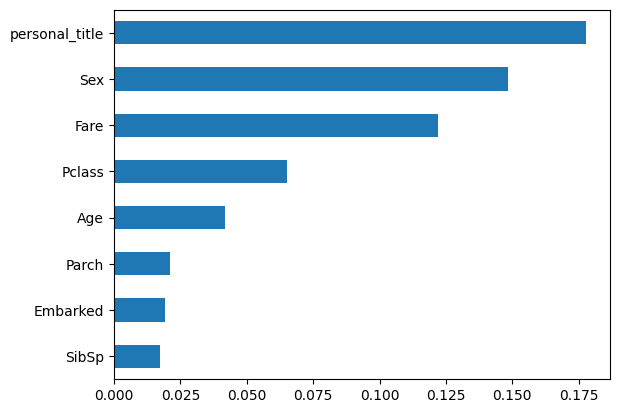

In [ ]:
pd.Series(data=scores, index=df_features.columns).sort_values().plot.barh()